# Project Green  City  Taxi . 

# Contents of the Repo , 

In [1]:
# Getting Dendencies  

import pandas as pd
import csv
import numpy as np
from datetime import datetime
import datetime as dt
from datetime import timedelta  # it is a spanned based time . 

import matplotlib.pyplot as plt
import os, json, requests, pickle
from scipy.stats import skew
from shapely.geometry import Point,Polygon,MultiPoint,MultiPolygon
from scipy.stats import ttest_ind, f_oneway, lognorm, levy, skew, chisquare

#import scipy.stats as st
from sklearn.preprocessing import normalize, scale
from tabulate import tabulate #pretty print of tables. source: http://txt.arboreus.com/2013/03/13/pretty-print-tables-in-python.html
from shapely.geometry import Point,Polygon,MultiPoint
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Firs Step . Download Dataset and Print out the size. 
if os.path.exists('green_tripdata_2019-01.csv'):# check if the Data is present and load it . 
    Data= pd.read_csv('green_tripdata_2019-01.csv')
else: # Download Data Jan if not available on desktop . 
    url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2019-01.csv"
    Data= pd.read_url('url')
    Data= Data.to_csv(url.split('/')[-1])

# print number rows and number of columns 
print(Data.shape[0]) 
print(Data.shape[1])


630918
20


In [3]:
Data 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,12/21/18 15:17,12/21/18 15:18,N,1,264,264,5,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2,1,NaN
1,2,1/1/19 0:10,1/1/19 0:16,N,1,97,49,2,0.86,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2,1,NaN
2,2,1/1/19 0:27,1/1/19 0:31,N,1,49,189,2,0.66,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,1,1,NaN
3,2,1/1/19 0:46,1/1/19 1:04,N,1,189,17,2,2.68,13.5,0.5,0.5,2.96,0.0,NaN,0.3,19.71,1,1,NaN
4,2,1/1/19 0:19,1/1/19 0:39,N,1,82,258,1,4.53,18.0,0.5,0.5,0.00,0.0,NaN,0.3,19.30,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630913,2,1/31/19 23:08,1/31/19 23:22,N,1,255,226,1,3.33,13.0,0.5,0.5,2.14,0.0,NaN,0.3,18.39,1,1,0.0
630914,2,1/31/19 23:21,1/31/19 23:23,N,1,75,151,1,0.72,4.0,0.5,0.5,1.06,0.0,NaN,0.3,6.36,1,1,0.0
630915,2,1/31/19 23:30,1/31/19 23:36,N,1,75,238,1,1.75,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,1,1,0.0
630916,2,1/31/19 23:59,2/1/19 0:04,N,1,74,74,1,0.57,5.0,0.5,0.5,1.00,0.0,NaN,0.3,7.30,1,1,0.0


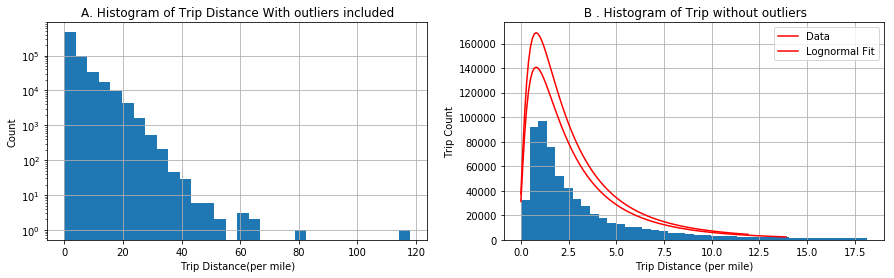

In [4]:
# define the figure with 2 subplots
fig,ax = plt.subplots(1,2,figsize = (15,4)) 

# Histogram of Number of Trip distance 

Data.trip_distance.hist(bins=30 , ax = ax[0])
ax[0].set_xlabel('Trip Distance(per mile)')
ax[0].set_ylabel('Count')
ax[0].set_yscale('log')
ax[0].set_title('A. Histogram of Trip Distance With outliers included')


# Create a vector to contain  Trip Distance

v = Data.trip_distance
# # Exclude any data point that is further than 4 standard deviations of median point 
# and plot hist with 40 bin

v[~((v-v.median()).abs()>4*  v.std())].hist(bins=40, ax= ax[1])
ax[1].set_xlabel('Trip Distance (per mile)')
ax[1].set_ylabel('Trip Count')
ax[1].set_title(' B . Histogram of Trip without outliers')

# Apply a lognormal fit . use the mean of Trip Distancce as the scale parameter 
Scatter,loc,mean = lognorm.fit(Data.trip_distance.values,
                               scale = Data.trip_distance.mean(), 
                                loc = 0 )
pdf_fitted = lognorm.pdf(np.arange(0,14,.1), Scatter , loc, mean)
ax[1].plot(np.arange(0,14,.1), 500000 * pdf_fitted, 'r')
ax[1].legend (['Data', 'lognorm fit '])

# # # create a vector to contain Trip Distance
v = Data.trip_distance 
# # exclude any data point located further than 3 standard deviations of the median point and 
# # plot the histogram with 30 bins


# apply a lognormal fit. Use the mean of trip distance as the scale parameter

scatter,loc,mean = lognorm.fit(Data.trip_distance.values,
                               scale=Data.trip_distance.mean(),
                               loc=0)
pdf_fitted = lognorm.pdf(np.arange(0,12,.1),scatter,loc,mean)
ax[1].plot(np.arange(0,12,.1),600000*pdf_fitted,'r') 
ax[1].legend(['Data','Lognormal Fit'])

# # export the figure
# plt.savefig('Question2.jpeg',format='jpeg')
# plt.show()

The Trip Distance is asymmetrically distributed.It is skewed to the right and it has a median smaller than its mean and both smaller than the standard deviation. The skewness is due to the fact that the variable has a lower boundary of 0.The distance can't be negative. https://www.itl.nist.gov/div898/handbook/eda/section3/eda3669.htm 

To the left is plotted the distribution of the entire raw set of Trip distance. To the right, outliers have been removed before plotting. Outliers are defined as any point located further than 3 standard deviations from the mean

The hypothesis: The trips are not random. If there were random, we would have a (symmetric) Gaussian distribution. The non-zero autocorrelation may be related the fact that people taking ride are pushed by a common cause, for instance, people rushing to work.



# We are going to examine if the time of the day has any impact on the trip distance. 

In [5]:
# Data.lpep_dropoff_datetime
# Data.lpep_pickup_datetime


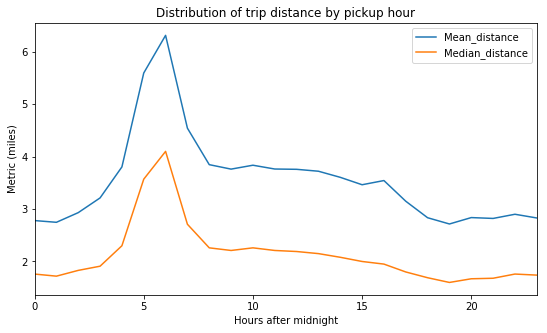

-----Trip distance by hour of the day-----

  Hour    Mean distance    Median distance
------  ---------------  -----------------
     0          2.78036               1.76
     1          2.74724               1.72
     2          2.93167               1.83
     3          3.21267               1.91
     4          3.80381               2.3
     5          5.59522               3.57
     6          6.31331               4.1
     7          4.54271               2.71
     8          3.84695               2.26
     9          3.76172               2.21
    10          3.83611               2.26
    11          3.76362               2.21
    12          3.75803               2.19
    13          3.72149               2.15
    14          3.6052                2.08
    15          3.46379               2
    16          3.54357               1.95
    17          3.14932               1.8
    18          2.83449               1.69
    19          2.71527               1.6
    20          2

In [6]:
# First, convert pickup and drop off datetime variable in their specific righ format
Data['lpep_pickup_dt'] = Data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%m/%d/%y %H:%M"))
Data['lpep_dropoff_dt'] = Data.lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%m/%d/%y %H:%M"))

# Second, create a variable for pickup hours
Data['Pickup_hour'] = Data.lpep_pickup_dt.apply(lambda x:x.hour)

# Mean and Median of trip distance by pickup hour
# I will generate the table but also generate a plot for a better visualization

fig,ax = plt.subplots(1,1,figsize=(9,5)) # prepare fig to plot mean and median values
# use a pivot table to aggregate Trip_distance by hour
table1 = Data.pivot_table(index='Pickup_hour', values='trip_distance',aggfunc=('mean','median')).reset_index()
# rename columns
table1.columns = ['Hour','Mean_distance','Median_distance']
table1[['Mean_distance','Median_distance']].plot(ax=ax)
plt.ylabel('Metric (miles)')
plt.xlabel('Hours after midnight')
plt.title('Distribution of trip distance by pickup hour')
#plt.xticks(np.arange(0,30,6)+0.35,range(0,30,6))
plt.xlim([0,23])
plt.savefig('Question3_1.jpeg',format='jpeg')
plt.show()
print ('-----Trip distance by hour of the day-----\n')
print (tabulate(table1.values.tolist(),["Hour","Mean distance","Median distance"]))

In [7]:
Data.tail()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lpep_pickup_dt,lpep_dropoff_dt,Pickup_hour
630913,2,1/31/19 23:08,1/31/19 23:22,N,1,255,226,1,3.33,13.0,...,0.0,NaN,0.3,18.39,1,1,0.0,2019-01-31 23:08:00,2019-01-31 23:22:00,23
630914,2,1/31/19 23:21,1/31/19 23:23,N,1,75,151,1,0.72,4.0,...,0.0,NaN,0.3,6.36,1,1,0.0,2019-01-31 23:21:00,2019-01-31 23:23:00,23
630915,2,1/31/19 23:30,1/31/19 23:36,N,1,75,238,1,1.75,7.0,...,0.0,NaN,0.3,8.30,1,1,0.0,2019-01-31 23:30:00,2019-01-31 23:36:00,23
630916,2,1/31/19 23:59,2/1/19 0:04,N,1,74,74,1,0.57,5.0,...,0.0,NaN,0.3,7.30,1,1,0.0,2019-01-31 23:59:00,2019-02-01 00:04:00,23
630917,2,1/31/19 23:18,1/31/19 23:26,N,1,75,262,1,2.11,8.5,...,0.0,NaN,0.3,11.76,1,1,0.0,2019-01-31 23:18:00,2019-01-31 23:26:00,23


In [8]:
# Writing Key Notes take away. 

In [74]:
# Selecting airpor trips, finding the average of fare per trip, total amount charged. 
airports_trips = Data[(Data.RatecodeID == 1) | (Data.RatecodeID == 3)]
print("Number of Trips to/ from NYC airports :" ,airports_trips.shape[0])
print("Average of Fare (calculated by meter) of trips to / from NYC airports: $ ",airports_trips.fare_amount.mean(),"per trip")
print("Average Total Amount charged before the trips to / from NYC airports: $ ",airports_trips.total_amount.mean(),"per trip")
print("Maximum of Fare (calculated by meter) of trips to / from NYC airports: $ ",airports_trips.fare_amount.max(),"per trip")

Number of Trips to/ from NYC airports : 577997
Average of Fare (calculated by meter) of trips to / from NYC airports: $  12.573365311584661 per trip
Average Total Amount charged before the trips to / from NYC airports: $  14.80221113596121 per trip
Maximum of Fare (calculated by meter) of trips to / from NYC airports: $  392.5 per trip


Now that we have seen the number and mean fare of airport trips,
let's take a closer look at how trips are distributed by trip distances and hour of the day


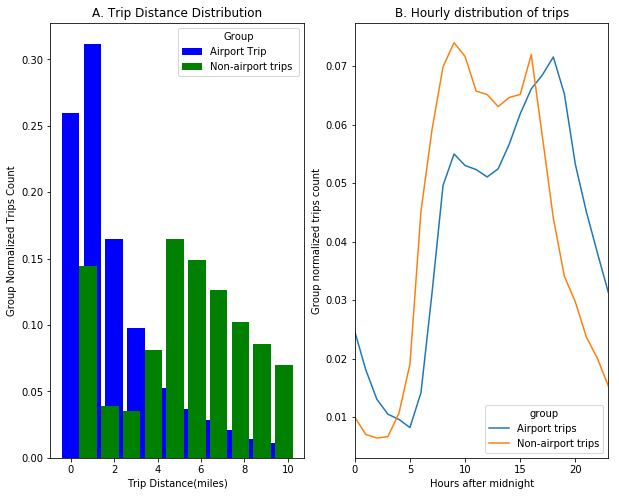

In [95]:
# Create a vector to contain Trip Distance . 
v1 = airports_trips.trip_distance
v2 = Data.loc[~Data.index.isin (v1.index),'trip_distance'] # non- airport trips

# remove outliers : 
# Exclude any data point located further than 2 standard deviations of the median point and histogram with 30 bins 

v1 = v1[~((v1-v1.mean()).abs()>2*v1.std())]
v2 = v2[~((v2-v2.mean ()).abs()>2*v2.std())]

# # Define Bins bounries.

bins = np.histogram(v1, normed = True)[1]
h1 = np.histogram(v1, bins = bins , normed = True)
h2 = np.histogram(v2 , bins = bins , normed =True)

# # plots distribution of trips distance normilized among groups 

fig,ax = plt.subplots(1, 2,figsize = (10,8))
w =.8 *(bins[1] - bins[0])
ax[0].bar(bins[:-1], h1[0], alpha =1 , width = w, color = 'b')
ax[0].bar(bins[:-1] + w, h2[0], alpha =1 , width = w, color = 'g')
ax[0].legend(['Airport Trip','Non-airport trips '] , loc = 'best', title = 'Group')
ax[0].set_xlabel('Trip Distance(miles)')
ax[0].set_ylabel('Group Normalized Trips Count')
ax[0].set_title('A. Trip Distance Distribution')

#  Plot Hour Distribution  

airports_trips.Pickup_hour.value_counts(normalize=True).sort_index().plot(ax=ax[1])
Data.loc[~Data.index.isin(v1.index),'Pickup_hour'].value_counts(normalize=True).sort_index().plot(ax=ax[1])
ax[1].set_xlabel('Hours after midnight')
ax[1].set_ylabel('Group normalized trips count')
ax[1].set_title('B. Hourly distribution of trips')
ax[1].legend(['Airport trips','Non-airport trips'],loc='best',title='group')
# plt.savefig('Question3_2.jpeg',format='jpeg')
plt.show()



